#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=c48215c18a4a926c219b89c889a6ddb854f13b5689e32c1d152668fa6bf27b44
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built MiniSom


## Importing the libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

##Training the SOM


In [7]:
from minisom import MiniSom
som = MiniSom(x= 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


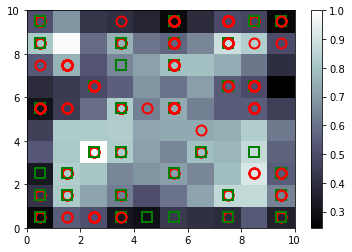

In [8]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r','g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

## Finding the frauds


In [11]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,3)], mappings[(8,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)

#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [12]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [13]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Libraries

In [15]:
from keras.models import Sequential
from keras.layers import Dense

## Initializing the ANN

In [16]:
classifier = Sequential()

##Adding the input layer and the first hidden layer

In [17]:
classifier.add(Dense(units=2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

## Adding the output layer

In [20]:
classifier.add(Dense(units=1, kernel_initializer= 'uniform', activation= 'sigmoid'))

## Compiling the ANN

In [21]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting ANN to training set

In [22]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs =2)

Epoch 1/2
690/690 [==============================] - 1s 784us/step - loss: 0.4536 - accuracy: 0.9725
Epoch 2/2
690/690 [==============================] - 1s 787us/step - loss: 0.2106 - accuracy: 0.9725


## Predicting probability of fraud

In [24]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]